<a href="https://colab.research.google.com/github/mp352/Home-Credit-Indonesia-Data-Scientist-Virtual-Internship-Program/blob/main/Wahida_Hamida_Bahar_VIX_Home_Credit_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [6]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# IMPORTING DATA 

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [18]:
files = [file for file in os.listdir("/content/drive/MyDrive/home-credit-default-risk")]
print(files)


['HomeCredit_columns_description.csv', 'application_test.csv', 'POS_CASH_balance.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv']


In [25]:
atest = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/application_test.csv")
atrain = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/application_train.csv")
burbal = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/bureau_balance.csv")
bureau = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/bureau.csv")
ccbal = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/credit_card_balance.csv")
ipay = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/installments_payments.csv")
pcbal = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/POS_CASH_balance.csv")
preva = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/previous_application.csv")

# EXPLORING DATA 

In [49]:
atest.shape

(48744, 121)

In [27]:
atest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [28]:
atest.sample()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38691,384749,Cash loans,F,N,Y,0,157500.0,369720.0,20772.0,292500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.04622,-21459,-3778,-9305.0,-4768,NaN,1,1,0,1,0,0,Security staff,2.0,1,1,THURSDAY,10,0,0,0,0,1,1,Military,NaN,0.683045,0.619528,0.0278,0.048,0.9831,0.7688,NaN,0.0,0.1034,0.0833,NaN,0.0213,0.0227,0.0132,0.0,0.0043,0.0284,0.0498,0.9831,0.7779,NaN,0.0,0.1034,0.0833,NaN,0.0218,0.0248,0.0138,0.0,0.0046,0.0281,0.048,0.9831,0.7719,NaN,0.0,0.1034,0.0833,NaN,0.0217,0.0231,0.0135,0.0,0.0044,reg oper account,block of flats,0.0219,"Stone, brick",No,1.0,0.0,1.0,0.0,-722.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0


In [50]:
atest.SK_ID_CURR.nunique()

48744

Terlihat bahwa tidak ada `SK_ID_CURR` yang duplikat, artinya setiap baris sudah mewakili satu individu.

In [26]:
atrain.shape

(307511, 122)

In [29]:
atrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [30]:
atrain.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19853,123156,0,Revolving loans,F,N,Y,1,175500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006305,-10081,-2613,-763.0,-763,NaN,1,1,1,1,0,0,Sales staff,3.0,3,3,WEDNESDAY,5,0,0,0,0,0,0,Trade: type 2,0.330968,0.605829,0.49206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-729.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0


In [46]:
atrain.SK_ID_CURR.nunique()

307511

Terlihat bahwa tidak ada `SK_ID_CURR` yang duplikat, artinya setiap baris sudah mewakili satu individu.

In [32]:
burbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [33]:
burbal.sample()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
9452801,5937717,-30,C


In [34]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [36]:
bureau.sample()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
841580,104247,6270938,Active,currency 1,-323,0,1503.0,NaN,NaN,0,3420000.0,3066282.0,0.0,0.0,Consumer credit,-38,NaN


In [37]:
ccbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [38]:
ccbal.sample()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1473334,1374511,318597,-23,176736.825,225000,0.0,0.0,0.0,0.0,9106.29,9900.0,9900.0,172226.115,178088.895,178088.895,0.0,0,0.0,0.0,18.0,Active,0,0


In [39]:
ipay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [40]:
ipay.sample()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3384031,1118489,183565,1.0,8,-1713.0,-1692.0,14780.43,14765.94


In [41]:
pcbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [42]:
pcbal.sample()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
4805436,1865502,299086,-16,24.0,22.0,Active,0,0


In [43]:
preva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [44]:
preva.sample()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
385427,2608705,434693,Cash loans,49293.54,450000.0,504702.0,NaN,450000.0,TUESDAY,13,Y,1,NaN,NaN,NaN,XNA,Approved,-1317,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

In [ ]:
data = atrain[["TARGET","SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
"NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
"FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]

data_test = atest[["SK_ID_CURR", "NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
"NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
"FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]

In [105]:
data = data.replace({"NAME_CONTRACT_TYPE":{"Cash loans":0 , "Revolving loans":1} , "CODE_GENDER":{"M":0,"F":1, "XNA":1},
                                 "FLAG_OWN_CAR":{"N":0,"Y":1}, "FLAG_OWN_REALTY":{"N":0,"Y":1} , "NAME_CONTRACT_STATUS" : {"Approved": 0, "Refused" : 1, "Canceled": 2, "Unused offer" : 2 } ,
                                 "CREDIT_ACTIVE" : {"Closed": 0, "Active" : 1, "Sold": 2, "Bad debt" : 3 }, 
                     "NAME_EDUCATION_TYPE" : {"Secondary / secondary special" : 1 , "Higher education" : 2 , "Incomplete higher": 2 , "Lower secondary" : 0, "Academic degree" : 3}}) 
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,100002,0,0,0,1,0,202500.0,406597.5,Unaccompanied,Working,1,Single / not married,House / apartment,1,1,0,1,1,0,Laborers
1,100003,0,1,0,0,0,270000.0,1293502.5,Family,State servant,2,Married,House / apartment,1,1,0,1,1,0,Core staff
2,100004,1,0,1,1,0,67500.0,135000.0,Unaccompanied,Working,1,Single / not married,House / apartment,1,1,1,1,1,0,Laborers
3,100006,0,1,0,1,0,135000.0,312682.5,Unaccompanied,Working,1,Civil marriage,House / apartment,1,1,0,1,0,0,Laborers
4,100007,0,0,0,1,0,121500.0,513000.0,Unaccompanied,Working,1,Single / not married,House / apartment,1,1,0,1,0,0,Core staff


In [106]:
data_test = data_test.replace({"NAME_CONTRACT_TYPE":{"Cash loans":0 , "Revolving loans":1} , "CODE_GENDER":{"M":0,"F":1, "XNA":1},
                                 "FLAG_OWN_CAR":{"N":0,"Y":1}, "FLAG_OWN_REALTY":{"N":0,"Y":1} , "NAME_CONTRACT_STATUS" : {"Approved": 0, "Refused" : 1, "Canceled": 2, "Unused offer" : 2 } ,
                                 "CREDIT_ACTIVE" : {"Closed": 0, "Active" : 1, "Sold": 2, "Bad debt" : 3 }, 
                     "NAME_EDUCATION_TYPE" : {"Secondary / secondary special" : 1 , "Higher education" : 2 , "Incomplete higher": 2 , "Lower secondary" : 0, "Academic degree" : 3}}) 
data_test.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100001,1,0,1,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,2,Married,House / apartment,1,1,0,1,0,1,Laborers,2.0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,1,Married,House / apartment,1,1,0,1,0,0,Low-skill Laborers,2.0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,2,Married,House / apartment,1,1,0,1,0,0,Drivers,2.0
3,100028,1,0,1,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,1,Married,House / apartment,1,1,0,1,1,0,Sales staff,4.0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,1,Married,House / apartment,1,1,1,1,0,0,Laborers,3.0


# EXPLORATORY DATA ANALYSIS

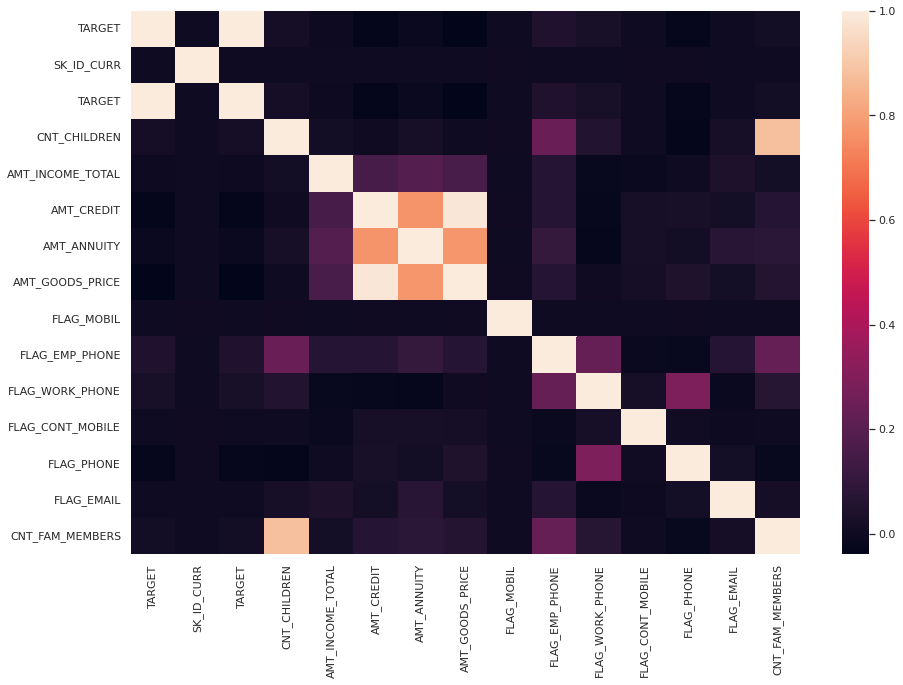

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [80]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [81]:
to_drop_hicorr

['TARGET', 'TARGET', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']

In [82]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [84]:
data_test.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE      2
CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        7
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [85]:
data_test.select_dtypes(exclude='object').nunique()

SK_ID_CURR          48744
CNT_CHILDREN           11
AMT_INCOME_TOTAL      606
AMT_CREDIT           2937
AMT_ANNUITY          7491
AMT_GOODS_PRICE       677
FLAG_MOBIL              2
FLAG_EMP_PHONE          2
FLAG_WORK_PHONE         2
FLAG_CONT_MOBILE        2
FLAG_PHONE              2
FLAG_EMAIL              2
CNT_FAM_MEMBERS        12
dtype: int64

In [87]:
for col in data_test.select_dtypes(include='object').columns.tolist():
    print(data_test[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         99.099376
Revolving loans     0.900624
Name: NAME_CONTRACT_TYPE, dtype: float64


F    67.040046
M    32.959954
Name: CODE_GENDER, dtype: float64


N    66.287133
Y    33.712867
Name: FLAG_OWN_CAR, dtype: float64


Y    69.05055
N    30.94945
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      83.370261
Family             12.065075
Spouse, partner     2.970622
Children            0.837026
Other_B             0.432874
Other_A             0.223617
Group of people     0.100525
Name: NAME_TYPE_SUITE, dtype: float64


Working                 50.330297
Commercial associate    23.391597
Pensioner               19.023880
State servant            7.246020
Student                  0.004103
Businessman              0.002052
Unemployed               0.002052
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    69.727556
Higher education                 25.677006
Incomplete higher                 3.536846
Lower secondary                   0.974479
Acad

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [88]:
data_test.drop('NAME_CONTRACT_TYPE', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# MISSING VALUES

### Missing Value Checking

Membuat variabel baru menggunakan fitur-fitur yang hanya digunakan.

In [146]:
data = atrain[["TARGET","SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
"NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
"FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]

data_test = atest[["SK_ID_CURR", "NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
"NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
"FLAG_EMAIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]]

In [147]:
df_null = data.isnull().sum().reset_index()
df_null.columns = ["features", "missing_value"]
df_null

,features,missing_value
0,TARGET,0
1,SK_ID_CURR,0
2,TARGET,0
3,NAME_CONTRACT_TYPE,0
4,CODE_GENDER,0
5,FLAG_OWN_CAR,0
6,FLAG_OWN_REALTY,0
7,CNT_CHILDREN,0
8,AMT_INCOME_TOTAL,0
9,AMT_CREDIT,0


In [95]:
df_null_test = data_test.isnull().sum().reset_index()
df_null_test.columns = ["features", "missing_value"]
df_null_test

,features,missing_value
0,SK_ID_CURR,0
1,CODE_GENDER,0
2,FLAG_OWN_CAR,0
3,FLAG_OWN_REALTY,0
4,CNT_CHILDREN,0
5,AMT_INCOME_TOTAL,0
6,AMT_CREDIT,0
7,AMT_ANNUITY,24
8,AMT_GOODS_PRICE,0
9,NAME_TYPE_SUITE,0


### Missing Values Filling

In [96]:
data.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [97]:
data["NAME_TYPE_SUITE"] = data["NAME_TYPE_SUITE"].fillna("Unaccompanied")
data_test["NAME_TYPE_SUITE"] = data_test["NAME_TYPE_SUITE"].fillna("Unaccompanied")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
data.groupby("OCCUPATION_TYPE").agg({"SK_ID_CURR":"count"})

,SK_ID_CURR
OCCUPATION_TYPE,
Accountants,9801
Cleaning staff,4648
Cooking staff,5939
Core staff,27530
Drivers,18589
HR staff,563
High skill tech staff,11370
IT staff,525
Laborers,151466


In [99]:
data["OCCUPATION_TYPE"] = data["OCCUPATION_TYPE"].fillna("Laborers")
data_test["OCCUPATION_TYPE"] = data_test["OCCUPATION_TYPE"].fillna("Laborers")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
data = data.dropna()
data_test = data_test.dropna()

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding.

In [102]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [103]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [104]:
onehot.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [107]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [108]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [109]:
std.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,-1.733356,-0.577494,0.141925,-0.478782,0.001804,0.468853,-0.498228,0.043265,1.601007,-0.245196
1,-1.733347,-0.577494,0.426472,1.724605,0.001804,0.468853,-0.498228,0.043265,1.601007,-0.245196
2,-1.733337,-0.577494,-0.427168,-1.153527,0.001804,0.468853,2.007111,0.043265,1.601007,-0.245196
3,-1.733317,-0.577494,-0.142621,-0.712100,0.001804,0.468853,-0.498228,0.043265,-0.624607,-0.245196
4,-1.733308,-0.577494,-0.199531,-0.214440,0.001804,0.468853,-0.498228,0.043265,-0.624607,-0.245196


### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi 

In [114]:
data_model = pd.concat([onehot, std, data], axis=1)

### Separated Data

In [149]:
data_x = data.drop("TARGET", axis=1)
target = data["TARGET"]

In [150]:
from collections import Counter
print(sorted(Counter(target).items()))

[('TARGET', 2)]


In [151]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampler , y_resampler = rus.fit_resample(data_model,target)
print(sorted(Counter(y_resampler).items()), y_resampler.shape)

ValueError: ignored

In [143]:
X = x_resampler
Y = y_resampler

NameError: ignored

# MODELING

### Logistic Regression

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [140]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

NameError: ignored

### Train-Test Split

In [115]:
from sklearn.model_selection import train_test_split

In [135]:
X = data_model.drop(data, axis=1)
y = data_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
X_train.shape, X_test.shape

((246008, 48), (61503, 48))

### Training

Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

ValueError: ignored

In [138]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

AttributeError: ignored